<font color='violet'>Instalamos las cosas de Spotify. Spotify ya tiene sus cosas.

In [45]:
!pip install spotipy

In [46]:
!pip install python-dotenv 

In [47]:
!pip install PyJSONViewer 

<font color='violet'>Importamos cositas

In [95]:
import sys
import numpy as np
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns
import matplotlib as plt
import pyjsonviewer 
import matplotlib.pyplot as plt

import mysql.connector
import os
from dotenv import load_dotenv
load_dotenv()

True

<font color='violet'>Aquí hay que poner las credenciales de Dashboard Olivia. Peeeeero para que nadie pueda ver mis credenciales me crearé un archivo .env( un archivo oculto) donde guardaré mis credenciales y luego lo llamaré con os.getenv. Este archivo oculto no se sube a github.

In [49]:
client_id = os.getenv('id')
client_secret = os.getenv('secret')

In [50]:
credenciales = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager = credenciales)
sp

<font color='violet'>Este es el link de la lista de Spotify. En la app, entras en la lista, en los 3 puntitos te sale abajo copiar link de la playlist.

In [51]:
link = 'https://open.spotify.com/playlist/56mdjdpzdMznS1ay3QgoM0?si=a825d3ebdc2f41ee'

<font color='violet'>Ahora sacamos el código de la playlist para aislarlo.

In [52]:
playlist_URI = link.split('/')[-1].split('?')[0]
playlist_URI

'56mdjdpzdMznS1ay3QgoM0'

<font color='violet'>Spotify sólo te deja sacar 100 canciones por llamada. Lo pone en la documentación.

In [53]:
x = sp.playlist_tracks(playlist_URI, limit = 100, offset = 0)
x

{'href': 'https://api.spotify.com/v1/playlists/56mdjdpzdMznS1ay3QgoM0/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2022-05-19T07:43:06Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/1183037273'},
    'href': 'https://api.spotify.com/v1/users/1183037273',
    'id': '1183037273',
    'type': 'user',
    'uri': 'spotify:user:1183037273'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1WjBIvYAnZTkTh5UiZNwlR'},
       'href': 'https://api.spotify.com/v1/artists/1WjBIvYAnZTkTh5UiZNwlR',
       'id': '1WjBIvYAnZTkTh5UiZNwlR',
       'name': 'Oliver Koletzki',
       'type': 'artist',
       'uri': 'spotify:artist:1WjBIvYAnZTkTh5UiZNwlR'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
   

<font color='violet'>Por eso hacemos un for muy chuli para que nos coja las canciones que tenemos. Como en la playlist hay 214 hay que hacer 3 grupos de 100.

In [54]:
offset = 0
all_data = []

for i in range(3):
    all_data.append(sp.playlist_tracks(playlist_URI, limit = 100, offset = 0))
    offset += 100

In [55]:
all_data

[{'href': 'https://api.spotify.com/v1/playlists/56mdjdpzdMznS1ay3QgoM0/tracks?offset=0&limit=100&additional_types=track',
  'items': [{'added_at': '2022-05-19T07:43:06Z',
    'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/1183037273'},
     'href': 'https://api.spotify.com/v1/users/1183037273',
     'id': '1183037273',
     'type': 'user',
     'uri': 'spotify:user:1183037273'},
    'is_local': False,
    'primary_color': None,
    'track': {'album': {'album_type': 'album',
      'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1WjBIvYAnZTkTh5UiZNwlR'},
        'href': 'https://api.spotify.com/v1/artists/1WjBIvYAnZTkTh5UiZNwlR',
        'id': '1WjBIvYAnZTkTh5UiZNwlR',
        'name': 'Oliver Koletzki',
        'type': 'artist',
        'uri': 'spotify:artist:1WjBIvYAnZTkTh5UiZNwlR'}],
      'available_markets': ['AD',
       'AE',
       'AG',
       'AL',
       'AM',
       'AO',
       'AR',
       'AT',
       'AU',
       'AZ',
 

In [56]:
len(all_data)

3

<font color='violet'>Con el json viewer nos sale una ventada con la info de la playlist.

In [57]:
pyjsonviewer.view_data(json_data = all_data)

In [58]:
x.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [59]:
len(x['items'])

100

<font color='violet'>Aquí nos vamos metiendo poco a poco dentro de la info.

In [60]:
all_data[0]['items'][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [61]:
all_data[0]['items'][0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [62]:
all_data[0]['items'][0]['track']['name']

'Spiritual but Not Religious'

<font color='violet'>¿ID de quién subió la canción?

In [63]:
all_data[0]['items'][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [64]:
all_data[0]['items'][0]['added_by'].keys()

dict_keys(['external_urls', 'href', 'id', 'type', 'uri'])

In [65]:
all_data[0]['items'][0]['added_by']['id']

'1183037273'

<font color='violet'>¡Vamos a ver quién ha añadido qué canción!

In [66]:
for i in range(len(all_data)):
    for z in range(len(all_data[i]['items'])):
        print(all_data[i]['items'][z]['track']['name']) #nombre canción
        print(all_data[i]['items'][z]['added_by']['id']) #nombre usuario spotify

Spiritual but Not Religious
1183037273
Ignite - 2016 League Of Legends World Championship
i4zireqdu6i5f0ktdqb0wvg92
Married Life
aliciafs97
End Credits
aliciafs97
THATS WHAT I WANT
aliciafs97
How Do I Make You Love Me?
aliciafs97
Perra
aliciafs97
The Pond
1183037273
Mon amour
1183037273
Canaries in a Coal Mine
1183037273
Hola
1183037273
Happy Man
1183037273
Another Day
1183037273
Do I Wanna Know?
1183037273
Plage
1183037273
In Fantasia
1183037273
10 Years
1183037273
Boogie Wonderland
aliciafs97
Mr. Blue Sky
aliciafs97
I Want To Break Free
aliciafs97
I'm Still Standing
aliciafs97
September
aliciafs97
Home
aliciafs97
Hey Hey
aliciafs97
Someone You Loved
aliciafs97
Flags
aliciafs97
Monsters
aliciafs97
Enemy (with JID) - from the series Arcane League of Legends
lyly25
Matemática de la Carne
315f3xitsetbl3dn3g5y5fu63fnq
La mujer cactus y el hombre globo
315f3xitsetbl3dn3g5y5fu63fnq
Haz de luz
315f3xitsetbl3dn3g5y5fu63fnq
Mon Amour - Remix
315f3xitsetbl3dn3g5y5fu63fnq
Tacones Rojos
315f3xits

In [67]:
basic_info = {'song': [] ,
              'artist': [],
              'user': [],
              'date': [],
              'explicit': [],
              'popularity': [],
              'uri': []}

In [68]:
for i in range(len(all_data)): 
    for z in range(len(all_data[i]["items"])): 
        basic_info["song"].append(all_data[i]["items"][z]["track"]["name"]) # nombre 
        basic_info["user"].append(all_data[i]["items"][z]["added_by"]["id"]) # usuario
        basic_info["artist"].append(all_data[i]["items"][z]["track"]["artists"][0]["name"]) # artista 
        basic_info["explicit"].append(all_data[i]["items"][z]["track"]["explicit"]) # explicito 
        basic_info["popularity"].append(all_data[i]["items"][z]["track"]["popularity"]) # popularidad 
        basic_info["date"].append(all_data[i]["items"][z]["added_at"]) #fecha 
        basic_info["uri"].append(all_data[i]["items"][z]["track"]["external_urls"]["spotify"]) #identificador cancion 

In [96]:
df = pd.DataFrame(basic_info)

In [97]:
df

song             artist  \
0                          Spiritual but Not Religious    Oliver Koletzki   
1    Ignite - 2016 League Of Legends World Champion...               Zedd   
2                                         Married Life  Michael Giacchino   
3                                          End Credits       Danny Elfman   
4                                    THATS WHAT I WANT          Lil Nas X   
..                                                 ...                ...   
295                                      Calypso Blues       Calypso Rose   
296                                        A Lo Cubano            Orishas   
297                                            Obá Iná          Metá Metá   
298                                            Abatina       Calypso Rose   
299                                            Ay Mamá  Rigoberta Bandini   

                          user                  date  explicit  popularity  \
0                   1183037273  2022-05-19T07:43:06Z     False          52   
1    i4zireqdu6i5f0ktdqb0wvg92  2022-05-19T07:46:24Z     False          54   
2                   aliciafs97  2022-05-19T07:48:23Z     False          45   
3                   aliciafs97  2022-05-19T07:49:44Z     False          22   
4                   aliciafs97  2022-05-19T07:50:56Z      True          89   
..                         ...                   ...       ...         ...   
295      lauracontreraspeinado  2022-05-19T14:56:30Z     False          54   
296      lauracontreraspeinado  2022-05-19T14:56:40Z     False          54   
297      lauracontreraspeinado  2022-05-19T14:56:46Z     False          30   
298      lauracontreraspeinado  2022-05-19T14:56:53Z     False          46   
299      lauracontreraspeinado  2022-05-19T14:58:29Z     False          68   

                                                   uri  
0    https://open.spotify.com/track/6fxq63aKjMmi1WM...  
1    https://open.spotify.com/track/39rqDP2s2hN1JtX...  
2    https://open.spotify.com/track/402diT3eJMfTvIT...  
3    https://open.spotify.com/track/0XANx8GtPXzDjzQ...  
4    https://open.spotify.com/track/0e8nrvls4Qqv5Rf...  
..                                                 ...  
295  https://open.spotify.com/track/26Myj8FOTQdBMqf...  
296  https://open.spotify.com/track/0BVYZVB6ITPs5jo...  
297  https://open.spotify.com/track/3TyQrs62Ma2oMsD...  
298  https://open.spotify.com/track/2bPdJqmpRMqKMNg...  
299  https://open.spotify.com/track/0khVEzctbwmqLvO...  

[300 rows x 7 columns]

In [98]:
df.explicit.value_counts()

False    291
True       9
Name: explicit, dtype: int64

In [71]:
uris = list(df.uri.unique())

In [72]:
uris

['https://open.spotify.com/track/6fxq63aKjMmi1WMI9iKX5w',
 'https://open.spotify.com/track/39rqDP2s2hN1JtXptyeM3u',
 'https://open.spotify.com/track/402diT3eJMfTvITPdyCxuM',
 'https://open.spotify.com/track/0XANx8GtPXzDjzQVqsudid',
 'https://open.spotify.com/track/0e8nrvls4Qqv5Rfa2UhqmO',
 'https://open.spotify.com/track/2Ghp894n1laIf2w98VeAOJ',
 'https://open.spotify.com/track/5Q27cpHUDQPttnB0xH7oBh',
 'https://open.spotify.com/track/0IyuvVFF4mXGi9viEqaEsI',
 'https://open.spotify.com/track/76IxUSbSk51sjFhaf6Os52',
 'https://open.spotify.com/track/7GGWY6lIIfOf3e7wHPmFsw',
 'https://open.spotify.com/track/14h6LDUzOjKxSRyO2I6hmu',
 'https://open.spotify.com/track/5nF6drlQTtXc5iThQoyONB',
 'https://open.spotify.com/track/65N5mnAk0WOubXkCryAxEe',
 'https://open.spotify.com/track/5FVd6KXrgO9B3JPmC8OPst',
 'https://open.spotify.com/track/6y4sVRatVOlBRref1xUqTO',
 'https://open.spotify.com/track/4xcCaMj1SbDztA3e9wGf14',
 'https://open.spotify.com/track/4O0LQKVT6hGmVGNwizmydg',
 'https://open

In [73]:
features = []

for cancion in uris:
    features.append(sp.audio_features(cancion))

In [74]:
df_features = pd.DataFrame(features)

In [75]:
df_features

0
0   {'danceability': 0.671, 'energy': 0.497, 'key'...
1   {'danceability': 0.723, 'energy': 0.741, 'key'...
2   {'danceability': 0.277, 'energy': 0.0657, 'key...
3   {'danceability': 0.27, 'energy': 0.22, 'key': ...
4   {'danceability': 0.737, 'energy': 0.846, 'key'...
..                                                ...
95  {'danceability': 0.946, 'energy': 0.49, 'key':...
96  {'danceability': 0.848, 'energy': 0.639, 'key'...
97  {'danceability': 0.605, 'energy': 0.708, 'key'...
98  {'danceability': 0.753, 'energy': 0.881, 'key'...
99  {'danceability': 0.687, 'energy': 0.56, 'key':...

[100 rows x 1 columns]

In [76]:
df_features = df_features[0].apply(pd.Series)
df_features.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.671  0.4970    0    -9.787     0       0.0552       0.17100   
1         0.723  0.7410    5    -4.442     0       0.0344       0.07140   
2         0.277  0.0657    0   -21.080     1       0.0398       0.97100   
3         0.270  0.2200   11   -16.029     1       0.0362       0.92100   
4         0.737  0.8460    1    -4.510     0       0.2200       0.00614   

   instrumentalness  liveness  valence    tempo            type  \
0          0.536000    0.1010    0.114   95.005  audio_features   
1          0.000032    0.0796    0.387  127.967  audio_features   
2          0.852000    0.0828    0.107   82.513  audio_features   
3          0.557000    0.0982    0.196  166.466  audio_features   
4          0.000000    0.0486    0.546   87.981  audio_features   

                       id                                   uri  \
0  6fxq63aKjMmi1WMI9iKX5w  spotify:track:6fxq63aKjMmi1WMI9iKX5w   
1  39rqDP2s2hN1JtXptyeM3u  spotify:track:39rqDP2s2hN1JtXptyeM3u   
2  402diT3eJMfTvITPdyCxuM  spotify:track:402diT3eJMfTvITPdyCxuM   
3  0XANx8GtPXzDjzQVqsudid  spotify:track:0XANx8GtPXzDjzQVqsudid   
4  0e8nrvls4Qqv5Rfa2UhqmO  spotify:track:0e8nrvls4Qqv5Rfa2UhqmO   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/6fxq63aKjMmi...   
1  https://api.spotify.com/v1/tracks/39rqDP2s2hN1...   
2  https://api.spotify.com/v1/tracks/402diT3eJMfT...   
3  https://api.spotify.com/v1/tracks/0XANx8GtPXzD...   
4  https://api.spotify.com/v1/tracks/0e8nrvls4Qqv...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/6fxq...       246707   
1  https://api.spotify.com/v1/audio-analysis/39rq...       195467   
2  https://api.spotify.com/v1/audio-analysis/402d...       250573   
3  https://api.spotify.com/v1/audio-analysis/0XAN...       231000   
4  https://api.spotify.com/v1/audio-analysis/0e8n...       143901   

   time_signature  
0               4  
1               4  
2               3  
3               4  
4               4

In [102]:
final = pd.merge(df, df_features, on = 'uri')

In [99]:
final.head()

Empty DataFrame
Columns: [song, artist, user, date, explicit, popularity, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, type, id, track_href, analysis_url, duration_ms, time_signature]
Index: []

[0 rows x 24 columns]

In [89]:
final2 = final[['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', "user"]] 

In [90]:
columnas = final2.columns

In [81]:
#columnas = final2.columns.drop('user')

In [82]:
#columnas

Index(['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [91]:
mapa = {'1183037273': "Ana", 
'i4zireqdu6i5f0ktdqb0wvg92': "guada", 
'aliciafs97': "Ali", 
'lyly25': "lyly", 
'315f3xitsetbl3dn3g5y5fu63fnq': "Lara", 
'almuu1392': "Almu", 
'lauracontreraspeinado': "Laura", 
'olivia002': "Olivia" } 

In [92]:
final2['user'] = final2['user'].map(mapa)

ValueError: min() arg is an empty sequence

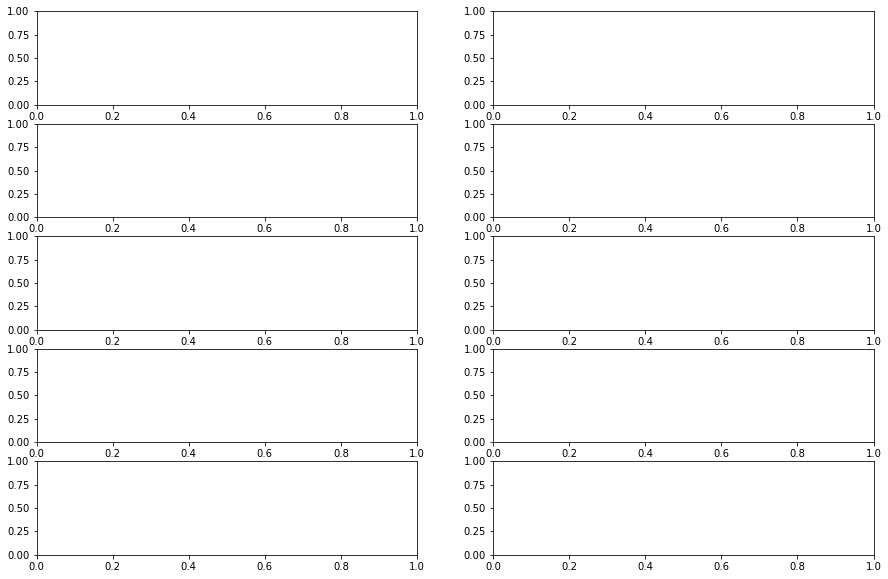

In [93]:
# fig, axes =plt.subplots(nrows = 5, ncols = 2, figsize = (15,10))

# axes = axes.flat

# for i, col in enumerate(columnas):
#     sns.barplot(x='user', y=col, data = final2, ax = axes[i])

# fig.tightlayout()
# plt.show()